<center><h1> TD N°2 : SVM non linéaire</h1></center>

Le but de ce TD est d'appliquer le modèle SVM lorsque l'échantillon n'est pas linéairement séparable.
Il convient donc de faire appel à d'autres modèles adaptés à cette situation (autres que la régression logistique, le LinearSVC ou encore le SGDClassifier). En d'autres termes, il s'agit de modifier un hyperparamètre essentiel qui est le noyau ("kernel"). De plus, chaque type de noyaux a ses propres hyperparamètres :
 - kernel = "linear" : "C"
 - kernel = "poly" : "C" et "degree"
 - kernel = "rbf" : "C" et "gamma"
 
Les paramètres du meilleur modèle seront définis après avoir tuné celui-ci avec les meilleurs hyperparamètres selon GridSearch et nous choisirons le modèle le plus performant selon les critères de l'accuracy et de l'AUC.

**Dans ce TD, il y a des éléments de correction car les choses n'étaient pas comprises lors du cours si bien que je n'arrivais à réaliser les choses demandées avant de faire la correction.**

## Import package

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

## Function

In [ ]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [ ]:
#Load dataset breast cancer
data = load_breast_cancer()

In [ ]:
data.feature_names # Il y a uniquement les colonnes X (les caractéristiques)
data.target # Il y seulement la variable cible (Y) => valeurs 0 et 1 = binaire
# data est en format array, il va falloir la transformer en dataframe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Conversion en DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df

# Ajouter la colonne cible (target)
df['target'] = data.target

# Afficher un aperçu du DataFrame
print(df.head(5))

# Afficher la dimension
df.shape # 569 lignes et 31 colonnes 

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

(569, 31)

In [ ]:
# Renommer les colonnes pour une meilleure lisiblité
df.columns = df.columns.str.replace(' ', '_')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [ ]:
#Statistiques intéréssantes sur le dataframe
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#Nb de NA par feature
df.isna().sum(axis=0) #va faire la sum par colonne et true=1 false=0
# pas de valeurs manquantes

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

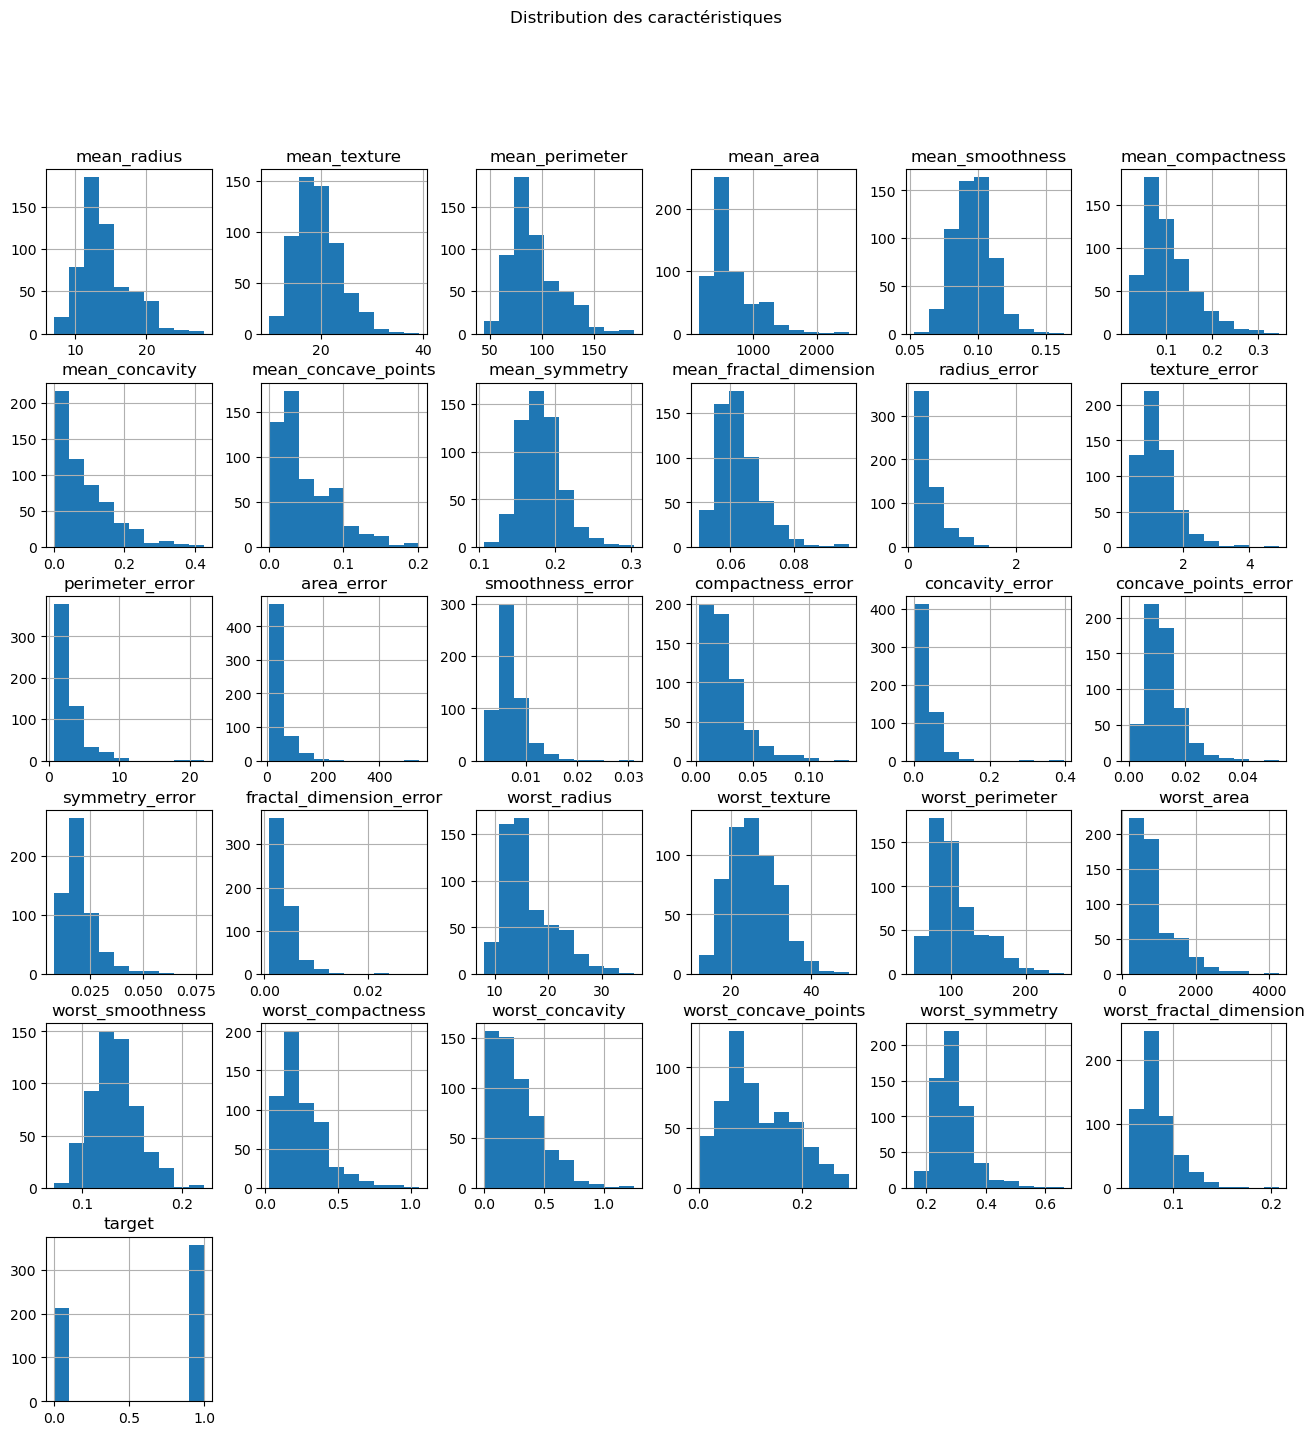

In [ ]:
df.hist(figsize=(16,16))
plt.suptitle('Distribution des caractéristiques')
plt.show()

#on peut standardiser les variables pour avoir une même plage de valeurs dans les représentations graphiques

In [ ]:
# distribution de la variable target 
df['target'].value_counts() # en effectifs

df['target'].value_counts(normalize=True) # en pourcentage

1    0.627417
0    0.372583
Name: target, dtype: float64

Nous pouvons voir que le pourcentage d'observations des étiquettes de classe 1 et 0 est de 62,74 % et 37,26 %. Cette répartition montre que la target est déséquilibrée. Il faudra la rééquilibrer lors de la modélisation.


In [ ]:
# Analyse des corrélations
corr = df.corr(method ="spearman")
corr.round(2).style.background_gradient(cmap='coolwarm').format("{:.2f}")

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
mean_radius,1.00,0.34,1.00,1.00,0.15,0.50,0.65,0.76,0.12,-0.35,0.55,-0.14,0.57,0.74,-0.33,0.26,0.36,0.41,-0.24,-0.01,0.98,0.31,0.97,0.98,0.13,0.49,0.60,0.73,0.17,0.04,-0.73
mean_texture,0.34,1.00,0.35,0.34,0.02,0.27,0.34,0.31,0.11,-0.06,0.36,0.45,0.39,0.40,0.04,0.26,0.29,0.24,0.01,0.15,0.37,0.91,0.38,0.37,0.10,0.29,0.34,0.32,0.12,0.12,-0.46
mean_perimeter,1.00,0.35,1.00,1.00,0.18,0.54,0.68,0.79,0.15,-0.30,0.56,-0.14,0.58,0.75,-0.31,0.31,0.40,0.44,-0.23,0.03,0.98,0.32,0.98,0.98,0.16,0.53,0.63,0.76,0.20,0.09,-0.75
mean_area,1.00,0.34,1.00,1.00,0.14,0.49,0.64,0.76,0.11,-0.36,0.55,-0.14,0.57,0.74,-0.33,0.26,0.36,0.41,-0.24,-0.01,0.98,0.32,0.97,0.98,0.12,0.49,0.59,0.72,0.17,0.04,-0.73
mean_smoothness,0.15,0.02,0.18,0.14,1.00,0.68,0.52,0.57,0.54,0.59,0.33,0.09,0.33,0.30,0.34,0.39,0.35,0.44,0.15,0.41,0.20,0.06,0.23,0.19,0.80,0.48,0.43,0.50,0.39,0.51,-0.37
mean_compactness,0.50,0.27,0.54,0.49,0.68,1.00,0.90,0.85,0.55,0.50,0.51,0.05,0.58,0.54,0.13,0.82,0.77,0.73,0.10,0.62,0.54,0.26,0.59,0.53,0.58,0.90,0.84,0.83,0.45,0.69,-0.61
mean_concavity,0.65,0.34,0.68,0.64,0.52,0.90,1.00,0.93,0.45,0.26,0.58,0.05,0.65,0.64,0.07,0.76,0.86,0.77,0.02,0.51,0.68,0.34,0.72,0.68,0.49,0.85,0.94,0.90,0.38,0.54,-0.73
mean_concave_points,0.76,0.31,0.79,0.76,0.57,0.85,0.93,1.00,0.42,0.14,0.64,0.01,0.68,0.73,0.02,0.61,0.67,0.76,-0.03,0.38,0.79,0.30,0.81,0.78,0.49,0.76,0.83,0.94,0.36,0.42,-0.78
mean_symmetry,0.12,0.11,0.15,0.11,0.54,0.55,0.45,0.42,1.00,0.43,0.34,0.14,0.35,0.29,0.21,0.44,0.37,0.38,0.38,0.40,0.16,0.12,0.19,0.15,0.42,0.44,0.39,0.40,0.71,0.41,-0.33
mean_fractal_dimension,-0.35,-0.06,-0.30,-0.36,0.59,0.50,0.26,0.14,0.43,1.00,0.00,0.16,0.06,-0.12,0.40,0.48,0.34,0.29,0.31,0.68,-0.29,-0.05,-0.25,-0.30,0.49,0.40,0.24,0.14,0.30,0.76,0.03


Au regard de la matrice des corrélations, nous pouvons remarquer qu'il y a de fortes corrélations entre les variables. <br>Cela suppose donc qu'il va falloir faire une sélection des caractéristiques avant d'entraîner les modèles

#### 3) Recoder les variables si nécessaire


In [ ]:
df.info()
#toutes les caractéristiques sont en float et notre variable d'intérêt est en integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [ ]:
# Extraire la partie triangulaire supérieure pour éviter les doublons
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper_tri

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
mean_radius,NaN,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean_texture,NaN,NaN,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean_perimeter,NaN,NaN,NaN,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean_area,NaN,NaN,NaN,NaN,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean_smoothness,NaN,NaN,NaN,NaN,NaN,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892
mean_compactness,NaN,NaN,NaN,NaN,NaN,NaN,0.896518,0.848295,0.552203,0.499195,...,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,-0.609288
mean_concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.927352,0.446793,0.258174,...,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,-0.733308
mean_concave_points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423767,0.142659,...,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,-0.777877
mean_symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428467,...,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,-0.332567
mean_fractal_dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,0.025903


In [ ]:
# Identifier les colonnes avec une corrélation forte (par exemple 0.8)
columns_correlees = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(columns_correlees)

['mean_perimeter', 'mean_area', 'mean_concavity', 'mean_concave_points', 'perimeter_error', 'area_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_compactness', 'worst_concavity', 'worst_concave_points']


In [ ]:
# Supprimer les colonnes redondantes
df_sans_corr = df.drop(columns=columns_correlees)

In [ ]:
df_sans_corr

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,smoothness_error,symmetry_error,fractal_dimension_error,worst_smoothness,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.03003,0.006193,0.16220,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01389,0.003532,0.12380,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.02250,0.004571,0.14440,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.05963,0.009208,0.20980,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.01756,0.005115,0.13740,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.01114,0.004239,0.14100,0.2060,0.07115,0
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.01898,0.002498,0.11660,0.2572,0.06637,0
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.01318,0.003892,0.11390,0.2218,0.07820,0
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.02324,0.006185,0.16500,0.4087,0.12400,0


In [ ]:
df_sans_corr.shape # 569 lignes et 15 colonnes contre 31 initialement

(569, 15)

## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [ ]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
#lgr.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
#svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
#sgdc_svm.fit(X_train_sc, y_train)

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [ ]:
# Garder uniquement 2 colonnes
list_two_col = df_sans_corr.columns[0:2]

In [ ]:
# valeurs extrêmes des 2 colonnes qui serviront à définir les limites des axes des graphiques suivantes
df_sans_corr['mean_radius'].min() #6.981
df_sans_corr['mean_radius'].max() #28.11

df_sans_corr['mean_texture'].min() #9.71
df_sans_corr['mean_texture'].max() #39.28

# limites : aller de 6 jusqu'à 30 pour mean_radius et de 9 jusqu'à 40 pour mean_texture


39.28

## Fonction de décision en fonction du type de noyau
### Kernel : linéaire

Text(0, 0.5, 'mean_texture')

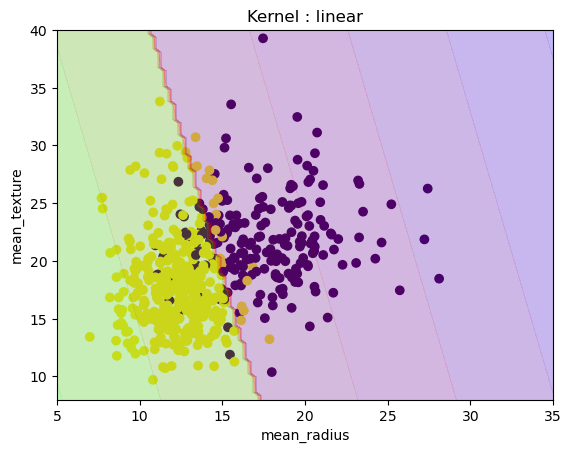

In [ ]:
class_svc = SVC(random_state=42, kernel='linear')
class_svc.fit(df_sans_corr.iloc[:,0:2],df_sans_corr['target'])

clf = class_svc
plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
plot_predictions(clf, [5, 35, 8, 40])
plt.title('Kernel : linear')
plt.xlabel(list_two_col[0])
plt.ylabel(list_two_col[1])

#plt.scatter(<col_1>, <col_2>, c=<target>)
#plot_predictions(clf, axes)
#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

Graphiquement, nous pouvons voir que les données ne sont pas linéairement séparables

### Kernel : poly


Text(0, 0.5, 'mean_texture')

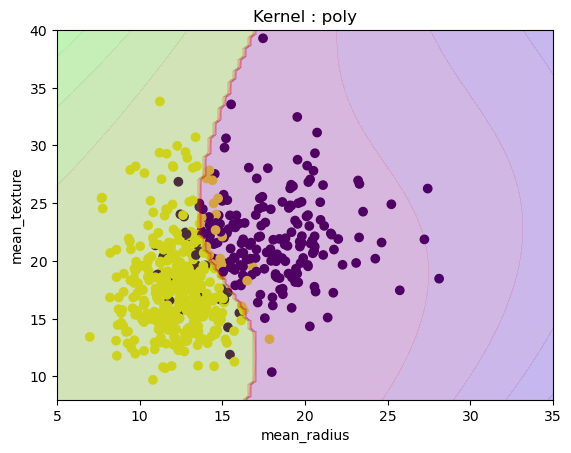

In [ ]:
poly_svc = SVC(random_state=42, kernel='poly')
poly_svc.fit(df_sans_corr.iloc[:,0:2],df_sans_corr['target'])
clf = poly_svc

plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
plot_predictions(clf, [5, 35, 8, 40])
plt.title('Kernel : poly')
plt.xlabel(list_two_col[0])
plt.ylabel(list_two_col[1])

Text(0, 0.5, 'mean_texture')

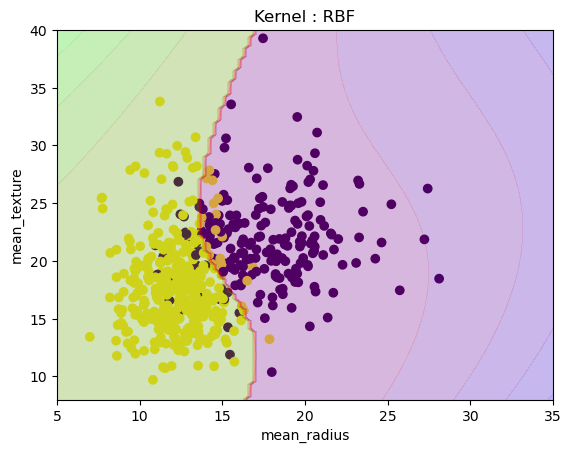

In [ ]:
rbf_svc = SVC(random_state=42, kernel='rbf')
rbf_svc.fit(df_sans_corr.iloc[:,0:2],df_sans_corr['target'])
clf = poly_svc

plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
plot_predictions(clf, [5, 35, 8, 40])
plt.title('Kernel : RBF')
plt.xlabel(list_two_col[0])
plt.ylabel(list_two_col[1])

## Utilisation d'une boucle pour chaque type de noyau selon l'hyperparamètre qui lui est spécifique
- kernel = "linear" : "C"
 - kernel = "poly" : "C" et "degree"
 - kernel = "rbf" : "C" et "gamma"

## Kernel : linear

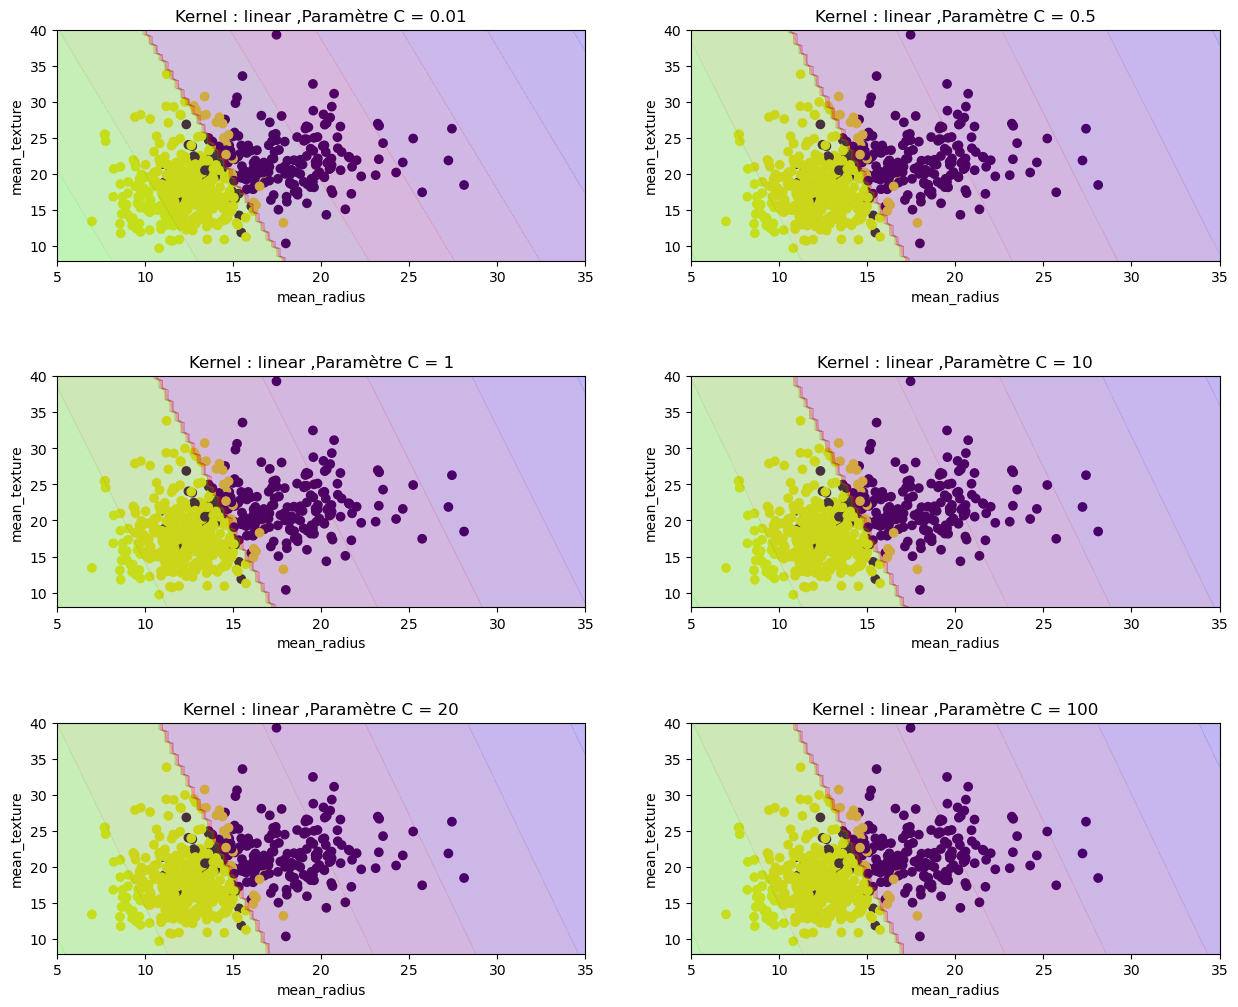

In [ ]:
#Paramètre régularisation
C = [0.01,0.5,1,10,20,100]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(C):

    #Train
    class_svc = SVC(C=j ,random_state=42 , kernel='linear')
    class_svc.fit(df_sans_corr.iloc[:,0:2], df_sans_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : linear ,Paramètre C = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])
    

## Kernel : polynomial

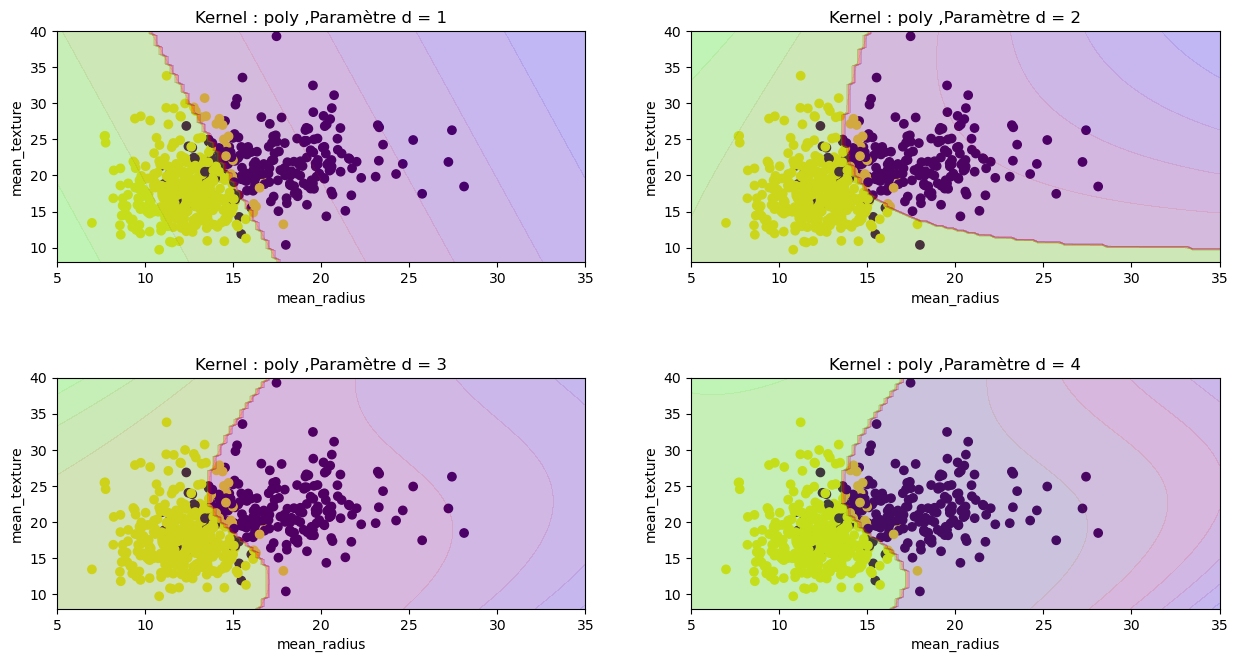

In [ ]:
#Paramètre degré
d = [1,2,3,4]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(d):

    #Train
    class_svc = SVC(degree=j ,random_state=42 , kernel='poly')
    class_svc.fit(df_sans_corr.iloc[:,0:2], df_sans_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : poly ,Paramètre d = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

## Kernel : Rbf

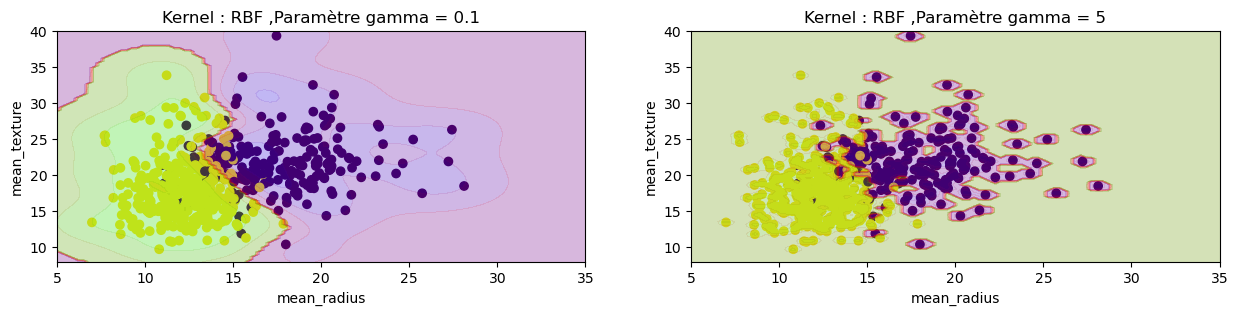

In [ ]:
#Paramètre gamma
gamma = [0.1,5]
#Taille image et subplot 
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

for i,j  in enumerate(gamma):

    #Train
    class_svc = SVC(gamma=j ,random_state=42 , kernel='rbf')
    class_svc.fit(df_sans_corr.iloc[:,0:2], df_sans_corr['target'])
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    #Plot
    plt.scatter(df_sans_corr.iloc[:,0], df_sans_corr.iloc[:,1], c=df_sans_corr['target'])
    plot_predictions(class_svc, [5, 35, 8, 40])
    plt.title('Kernel : RBF ,Paramètre gamma = '+str(j))
    plt.xlabel(list_two_col[0])
    plt.ylabel(list_two_col[1])

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [ ]:
# Séparation des données en train et test
X = df_sans_corr.drop('target', axis=1)
y = df_sans_corr['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# distribution de la variable target 
y_train.value_counts() # en effectifs

y_train.value_counts(normalize=True) # en pourcentage

1    0.628571
0    0.371429
Name: target, dtype: float64

Il faudrait augmenter l'évènement rare car l'effectif de la modalité 0 est plus faible => Upsampling

In [ ]:
# Appliquer l'échantillonnage stratifié uniquement sur l'ensemble d'entraînement
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

0    169
1    169
Name: target, dtype: int64

La variable target est désormais équilibrée

In [ ]:
#Scaling features
scaler = StandardScaler()
scaler.fit(X_train_resampled)

X_train_resampled_sc = scaler.transform(X_train_resampled)
X_test_sc = scaler.transform(X_test)

In [ ]:
#Regression logistique
lgr = LogisticRegression(random_state=42)
lgr.fit(X_train_resampled_sc, y_train_resampled)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_resampled_sc,y_train_resampled)

svc_poly = SVC(kernel='poly',random_state=42)
svc_poly.fit(X_train_resampled_sc,y_train_resampled)

svc_rbf = SVC(kernel='rbf',random_state=42)
svc_rbf.fit(X_train_resampled_sc,y_train_resampled)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_resampled_sc, y_train_resampled)

SGDClassifier(random_state=42)

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [ ]:
cvs_lgr = cross_val_score(lgr, X_train_resampled_sc, y_train_resampled, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_resampled_sc, y_train_resampled, cv=5, scoring='accuracy')

cvs_svc_poly = cross_val_score(svc_poly, X_train_resampled_sc, y_train_resampled, cv=5, scoring='accuracy')

cvs_svc_rbf = cross_val_score(svc_rbf, X_train_resampled_sc, y_train_resampled, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_resampled_sc, y_train_resampled, cv=5, scoring='accuracy')

In [ ]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_svc,cvs_svc_poly,cvs_svc_rbf,cvs_sgdc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','svc','svc_poly','svc_rbf','sgdc']

In [ ]:
df_cross

,fold1,fold2,fold3,fold4,fold5,model
0,0.985294,0.941176,0.955882,0.940299,0.955224,lgr
1,0.985294,0.941176,0.970588,0.940299,0.955224,svc
2,0.955882,0.926471,0.970588,0.910448,0.910448,svc_poly
3,0.985294,0.926471,0.985294,0.955224,0.940299,svc_rbf
4,0.926471,0.941176,0.970588,0.895522,0.955224,sgdc


#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

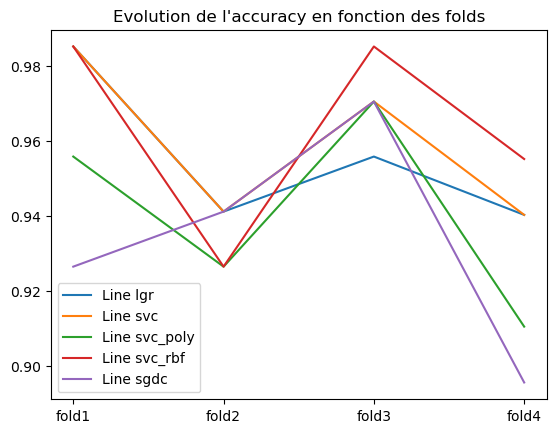

In [ ]:
# Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [ ]:
df_cross.head(5)

,fold1,fold2,fold3,fold4,fold5,model
0,0.985294,0.941176,0.955882,0.940299,0.955224,lgr
1,0.985294,0.941176,0.970588,0.940299,0.955224,svc
2,0.955882,0.926471,0.970588,0.910448,0.910448,svc_poly
3,0.985294,0.926471,0.985294,0.955224,0.940299,svc_rbf
4,0.926471,0.941176,0.970588,0.895522,0.955224,sgdc


In [ ]:
for i in range(5):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))

Le modèle N° 0 a une accuray de 0.9555750658472345 et un std : 0.0181943162679152
Le modèle N° 1 a une accuray de 0.9585162423178227 et un std : 0.019404772700000312
Le modèle N° 2 a une accuray de 0.9347673397717295 et un std : 0.02729789473394848
Le modèle N° 3 a une accuray de 0.9585162423178227 et un std : 0.02647526519615049
Le modèle N° 4 a une accuray de 0.9377963125548726 et un std : 0.02874809783584445


**Choix du modèle**

On prend le modèle svc qui correspond au noyau linéaire comme modèle final. Il est celui qui a le meilleur score en moyenne sur les folds 96%. A l'inverse le modèle svc_poly offre des performances plus faibles 93% de bonnes prédictions. 

Cependant, le modèle lgr est celui qui a le moins de variance entre les scores de ses folds 0.016 de std.


#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [ ]:
#Obtenir les hyperparamètres de SGDClassifier
#On visualise en même temps les valeurs des hyperparamètres par défaut.
SVC(kernel='linear').get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
params = {
    "C" : [0.5, 1, 10, 50,100,1000]
        }

c_svc = SVC(kernel='linear', random_state=42)

In [ ]:
grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=5, return_train_score=True)

In [ ]:
take_grid = grid_c_svc.fit(X_train_resampled_sc, y_train_resampled)

In [ ]:
take_grid.cv_results_

{'mean_fit_time': array([0.00312524, 0.00624943, 0.00625038, 0.00130563, 0.01692777,
        0.10046539]),
 'std_fit_time': array([0.00625048, 0.00765397, 0.00765512, 0.00261126, 0.00798238,
        0.01314347]),
 'mean_score_time': array([0.00130186, 0.        , 0.        , 0.00312471, 0.        ,
        0.00130148]),
 'std_score_time': array([0.00260372, 0.        , 0.        , 0.00624943, 0.        ,
        0.00260296]),
 'param_C': masked_array(data=[0.5, 1.0, 10.0, 50.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.5},
  {'C': 1},
  {'C': 10},
  {'C': 50},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.97058824, 0.98529412, 0.97058824, 0.95588235, 0.95588235,
        0.95588235]),
 'split1_test_score': array([0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
        0.94117647]),
 'split2_test_score': array([0.97058824, 0.97058824, 0.95588235, 0.97058824, 0.97058824,
        

In [ ]:
print("La meilleur combinaison d'estimateur est: " + str(take_grid.best_params_)+"\n"
      "pour un score de: " + str(take_grid.best_score_))

La meilleur combinaison d'estimateur est: {'C': 0.5}
pour un score de: 0.9585601404741002


<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>